#### Цель работы
Изучение алгоритмов и методов регрессии на практике

#### Описание предметной области
Вариант 3.
Набор данных: salary.csv и regression.xlsx.
Атрибуты файла salary.csv:
- age — возраст сотрудника в годах.
- income — годовой доход до текущей работы.
- experience — количество полных лет профессионального опыта.
- score_test — результат прохождения профессионального теста
- hours_worked — среднее количество рабочих часов в неделю.
- distance_to_work — расстояние от дома до места работы.
- savings — сумма сбережений на банковском счёте.
- debt — общий объём текущих долгов (по кредитам, картам и другим
обязательствам, в долларах).
- education — уровень образования: «High School» (школа), «Bachelor»
(бакалавр), «Master» (магистр) или «PhD» (доктор наук).
- city — город проживания: Нью-Йорк, Лос-Анджелес, Чикаго, Хьюстон или
Финикс. 
- job_type — сфера профессиональной деятельности: IT, финансы,
здравоохранение, образование или ритейл.
- marital_status — семейное положение: «Single» (холост/незамужем), «Married»
(в браке) или «Divorced» (в разводе).
- car — наличие автомобиля: «Yes» (есть) или «No» (нет).
- remote_work — работает ли сотрудник удалённо: «Yes» или «No».
- salary — годовая зарплата 

#### Ход выполнения лабораторной работы

В начале программы выполняется импорт необходимых библиотек:
- pandas — для работы с табличными данными, чтения файлов и формирования DataFrame;
- numpy — для математических операций и работы с массивами данных;
- LinearRegression из sklearn.linear_model — для построения и обучения модели линейной регрессии;
- train_test_split из sklearn.model_selection — для разделения выборки на обучающую и тестовую;
- metrics из sklearn — для вычисления метрик качества (MSE, MAE, RMSE, R²);
- matplotlib.pyplot — для построения графиков и визуализации результатов регрессии.

In [32]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, r2_score
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

На первом этапе выполняется загрузка исходных данных.
Для этого используется функция `read_excel()` из библиотеки pandas, которая позволяет считывать таблицы из файлов формата Excel (.xlsx).
В переменной file_path задаётся абсолютный путь к файлу, а в sheet_name — название листа, содержащего данные для конкретного варианта (в данном случае "var3").
Перед строкой пути используется символ r, что позволяет корректно интерпретировать обратные слэши в пути Windows.
После выполнения команды данные из Excel-листа загружаются в структуру DataFrame и сохраняются в переменной df, что позволяет выполнять дальнейший анализ и построение модели регрессии.

In [33]:
file_path = r"C:\ГУАП\5 семестр\ВвАД\LR3\regression.xlsx"
sheet_name = "var3"
df = pd.read_excel(file_path, sheet_name=sheet_name)

В данном блоке кода реализовано построение и анализ моделей простой линейной регрессии для признаков x1 и x2.
Каждая модель обучается на 75 % данных и проверяется на 25 % тестовой выборки.
Рассчитаны метрики качества (MAE, MSE, RMSE, R²), выведены коэффициенты уравнения и построены графики, иллюстрирующие соответствие между фактическими и предсказанными значениями.
Это позволяет оценить, какая из независимых переменных имеет более выраженную линейную зависимость с целевой переменной y.

Команда `display(df.head())` выводит на экран первые несколько строк (по умолчанию — пять) таблицы df, чтобы можно было визуально убедиться, что данные загружены и структурированы правильно: столбцы имеют нужные названия, типы данных корректные, а значения расположены ожидаемым образом

In [34]:
# === Проверим структуру данных ===
display(df.head())

,x1,x2,y
0,1.696315,-0.548550,0.870770
1,-0.560186,1.176442,0.539647
2,1.493260,0.386962,1.049902
3,0.162986,-1.232673,-1.490034
4,0.344845,0.740232,1.737131


Функция `simple_linear_regression(feature)` выполняет полный анализ простой линейной регрессии для одного выбранного признака из таблицы данных. Сначала она выводит название модели, где указывает, какой именно признак используется для прогнозирования целевой переменной y. Затем из датафрейма выделяются значения признака и целевой переменной, после чего данные делятся на обучающую и тестовую выборки: первые используются для обучения модели, а вторые — для проверки её точности.

Далее создаётся и обучается модель линейной регрессии, которая находит зависимость между выбранным признаком и целевой переменной. После обучения модель делает предсказания для тестовых данных, и результаты сравниваются с реальными значениями. Для наглядности формируется таблица, где отображаются исходные значения, предсказания и разница между ними.

Затем вычисляются показатели качества модели: средняя абсолютная ошибка (MAE), среднеквадратичная ошибка (MSE), её квадратный корень (RMSE) и коэффициент детерминации (R²), который показывает, насколько хорошо модель объясняет зависимость между переменными. Также выводятся коэффициенты уравнения регрессии — наклон прямой и её пересечение с осью Y, что позволяет записать итоговое уравнение вида y = a·x + b.

Функция строит несколько графиков: первый показывает точки исходных данных и линию регрессии, второй — разницу между предсказанными и реальными значениями (ошибки), а третий — сравнение фактических и прогнозируемых значений относительно идеальной линии совпадения.

In [35]:
# === Функция для выполнения всех пунктов по одному признаку ===
def simple_linear_regression(feature):
    print("="*80)
    print(f"Модель простой линейной регрессии: {feature} -> y")

    X = df[[feature]].values
    y = df["y"].values

    # Разделение на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=0
    )

    # Обучение модели
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Предсказание
    y_pred = model.predict(X_test)

    # Создаём датафрейм для сравнения истинных и предсказанных значений
    comparison = pd.DataFrame({
        feature: X_test.flatten(),
        "Actual": y_test,
        "Predicted": y_pred
    })
    comparison["Diff"] = comparison["Predicted"] - comparison["Actual"]
    display(comparison.head(10))

    # === Метрики качества ===
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, y_pred)

    print(f"MAE  = {mae:.4f}")
    print(f"MSE  = {mse:.4f}")
    print(f"RMSE = {rmse:.4f}")
    print(f"R²   = {r2:.4f}")

    # === Коэффициенты регрессии ===
    a = model.coef_[0]
    b = model.intercept_
    print(f"a (наклон)     = {a:.6f}")
    print(f"b (перехват)   = {b:.6f}")
    print(f"Уравнение регрессии: y = {a:.4f} * x + {b:.4f}")

    # === Визуализация 1: scatter + линия регрессии ===
    plt.figure(figsize=(7,5))
    plt.scatter(df[feature], df["y"], color="blue", label="Исходные данные")
    x_line = np.linspace(df[feature].min(), df[feature].max(), 100)
    y_line = a * x_line + b
    plt.plot(x_line, y_line, color="red", label="Линия регрессии")
    plt.xlabel(feature)
    plt.ylabel("y")
    plt.title(f"Линейная регрессия: {feature} -> y")
    plt.legend()
    plt.grid(True)
    plt.show()

    # === Визуализация 2: график разницы (ошибок) ===
    plt.figure(figsize=(7,4))
    plt.plot(comparison["Diff"].values, marker="o")
    plt.axhline(0, color="red", linestyle="--")
    plt.title(f"Разница (Predicted - Actual) для {feature}")
    plt.xlabel("Номер тестовой точки")
    plt.ylabel("Ошибка")
    plt.grid(True)
    plt.show()

    # === Визуализация 3: фактические vs предсказанные ===
    plt.figure(figsize=(6,6))
    plt.scatter(comparison["Actual"], comparison["Predicted"], color="blue")
    min_val = min(comparison["Actual"].min(), comparison["Predicted"].min())
    max_val = max(comparison["Actual"].max(), comparison["Predicted"].max())
    plt.plot([min_val, max_val], [min_val, max_val], "r--", label="Идеальная линия (45°)")
    plt.xlabel("Истинные значения (Actual)")
    plt.ylabel("Предсказанные (Predicted)")
    plt.title(f"Actual vs Predicted ({feature} -> y)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Возврат значений
    return {"feature": feature, "a": a, "b": b, "MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}

Данный фрагмент кода выполняет обучение двух моделей простой линейной регрессии — отдельно для признаков x1 и x2.

Сначала создаётся пустой список results, в который будут сохраняться результаты работы каждой модели. Затем с помощью цикла for поочерёдно выбираются два признака: x1 и x2. Для каждого из них вызывается функция simple_linear_regression(feat), которая строит модель линейной регрессии, обучает её, вычисляет метрики качества, строит графики и возвращает основные результаты (например, коэффициенты и ошибки).

Возвращённое значение сохраняется в переменной res, после чего добавляется в список results. Таким образом, после выполнения цикла в списке results будут храниться данные о двух построенных моделях — одна для зависимости y от x1, а другая для зависимости y от x2. Это позволяет затем сравнить, какой из признаков сильнее влияет на целевую переменную и какая модель показала лучшие результаты.

Модель простой линейной регрессии: x1 -> y


,x1,Actual,Predicted,Diff
0,-1.903132,3.449900,0.410711,-3.039189
1,0.287481,-1.183537,0.502256,1.685792
2,0.239031,-2.369876,0.500231,2.870107
3,-1.027521,-0.928042,0.447303,1.375345
4,1.086296,-2.260317,0.535638,2.795955
5,-0.326960,1.756478,0.476579,-1.279899
6,0.386399,0.402838,0.506389,0.103552
7,0.687901,1.491678,0.518989,-0.972689
8,-1.379044,3.012483,0.432613,-2.579870
9,1.169281,2.354451,0.539106,-1.815346


MAE  = 1.4422
MSE  = 2.9293
RMSE = 1.7115
R²   = -0.0058
a (наклон)     = 0.041789
b (перехват)   = 0.490242
Уравнение регрессии: y = 0.0418 * x + 0.4902


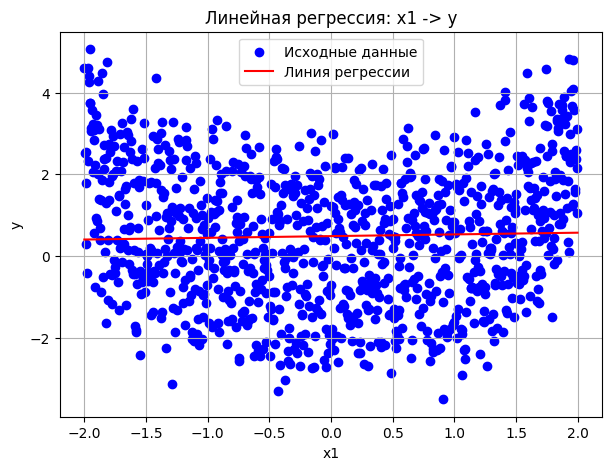

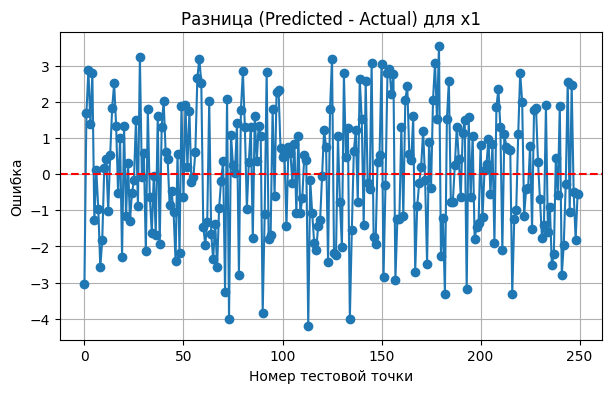

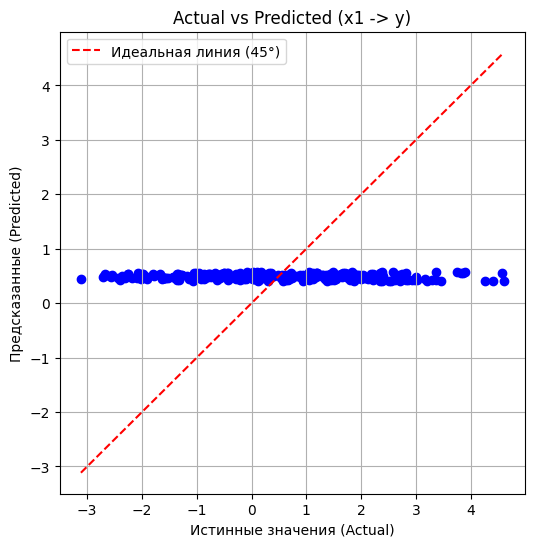

Модель простой линейной регрессии: x2 -> y


,x2,Actual,Predicted,Diff
0,0.751106,3.449900,1.402617,-2.047283
1,-1.552535,-1.183537,-1.424952,-0.241415
2,-1.897968,-2.369876,-1.848948,0.520927
3,-0.742311,-0.928042,-0.430455,0.497587
4,-0.375020,-2.260317,0.020371,2.280688
5,1.157589,1.756478,1.901549,0.145072
6,-0.160218,0.402838,0.284027,-0.118811
7,1.487642,1.491678,2.306668,0.814989
8,1.835041,3.012483,2.733078,-0.279405
9,1.772416,2.354451,2.656209,0.301758


MAE  = 0.6670
MSE  = 0.7421
RMSE = 0.8614
R²   = 0.7452
a (наклон)     = 1.227435
b (перехват)   = 0.480684
Уравнение регрессии: y = 1.2274 * x + 0.4807


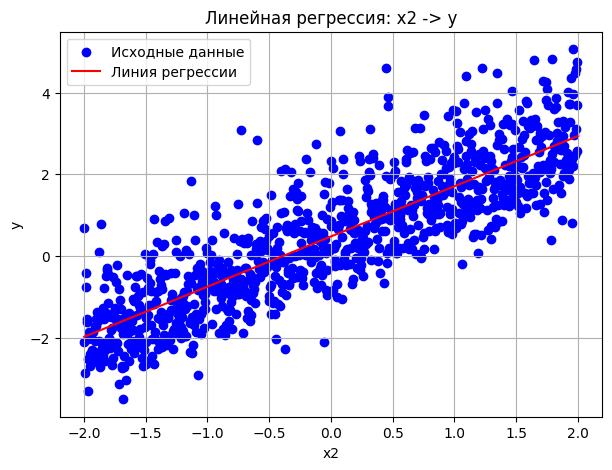

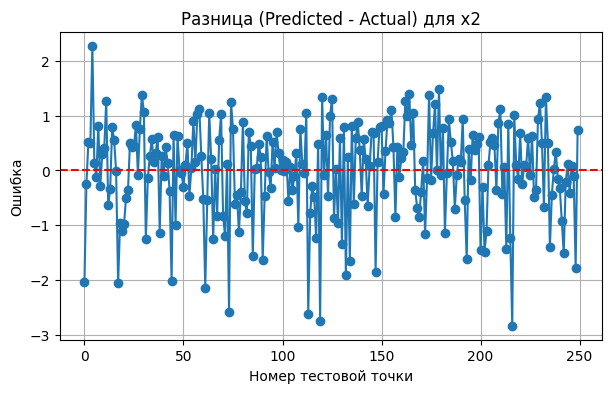

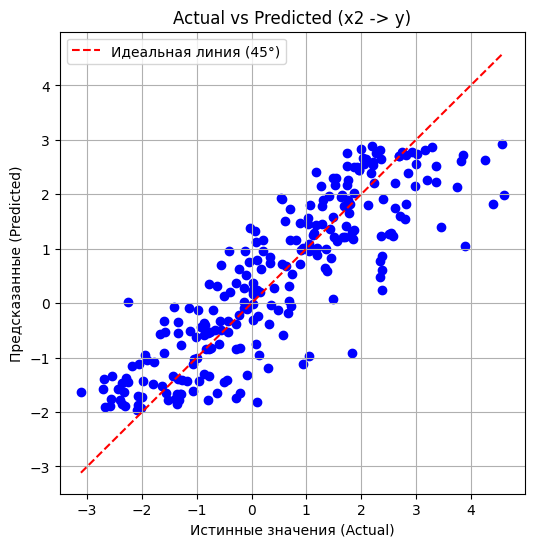

In [36]:
# === Обучение двух моделей ===
results = []
for feat in ["x1", "x2"]:
    res = simple_linear_regression(feat)
    results.append(res)

В переменной results уже содержатся словари, возвращённые функцией simple_linear_regression() — каждый словарь включает название признака, коэффициенты уравнения и метрики качества модели (MAE, MSE, RMSE, R²). Команда pd.DataFrame(results) преобразует этот список словарей в таблицу DataFrame, где каждая строка соответствует одной модели, а столбцы содержат её характеристики и показатели точности.

Команда display(summary) выводит полученную таблицу на экран, чтобы можно было наглядно сравнить результаты по всем признакам и определить, какая модель показала наилучшее качество предсказания.

In [37]:
# === Сводная таблица метрик ===
summary = pd.DataFrame(results)
display(summary)

,feature,a,b,MAE,MSE,RMSE,R2
0,x1,0.041789,0.490242,1.442176,2.929349,1.711534,-0.005781
1,x2,1.227435,0.480684,0.667010,0.742065,0.861432,0.745215


Данный код подготавливает данные для построения и обучения модели машинного обучения, используя только один признак x1, поскольку в предыдущем анализе было выявлено, что связь между x1 и y оказалась слабой, и требуется проверить или улучшить модель для этого признака.

Сначала из таблицы данных df извлекаются значения признака x1, которые сохраняются в переменной X, и значения целевой переменной y. После этого выполняется разделение исходных данных на две части: обучающую и тестовую выборки. Для этого используется функция train_test_split из библиотеки sklearn.model_selection.

Параметр test_size=0.25 указывает, что 25% данных будут использованы для тестирования модели, а оставшиеся 75% — для её обучения. Аргумент random_state=0 задаёт фиксированное значение генератора случайных чисел, чтобы при повторном запуске программа всегда делила данные одинаковым образом, обеспечивая воспроизводимость результатов.

В итоге формируются четыре массива: X_train и y_train — обучающая выборка (для обучения модели), а X_test и y_test — тестовая

In [38]:
# Берём х1, так как в линейной модели связь была слабой
X = df[["x1"]].values
y = df["y"].values

# Разделение на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Функция poly_regression(degree) выполняет построение и оценку полиномиальной регрессии заданной степени, позволяя исследовать нелинейную зависимость между признаком x1 и целевой переменной y. В начале работы функция выводит информацию о степени полинома, после чего с помощью инструмента PolynomialFeatures создаёт новые признаки — степени исходной переменной до указанной степени включительно. Например, если степень равна двум, формируются признаки x и x², если трём — добавляется x³ и так далее. Это позволяет модели описывать более сложные, изогнутые зависимости.

Далее на основе этих преобразованных данных обучается модель линейной регрессии, которая фактически становится полиномиальной за счёт добавленных степеней признака. После обучения модель делает предсказания на тестовой выборке, и результаты оцениваются с помощью двух метрик: средней абсолютной ошибки (MAE) и коэффициента детерминации (R²). Первая показывает среднее отклонение предсказанных значений от реальных, а вторая — насколько хорошо модель объясняет зависимость между переменными.

Затем функция строит график, где отображаются исходные точки данных и линия полиномиальной регрессии. Для этого создаётся равномерный диапазон значений x, подаваемый в модель, чтобы визуализировать плавную кривую зависимости. На графике видно, как выбранная степень полинома аппроксимирует данные: при низкой степени кривая простая и близка к прямой, при высокой — может более точно подстраиваться под форму распределения.

In [39]:
# === Полиномиальная регрессия (Часть 2) ===

def poly_regression(degree):
    print("="*80)
    print(f"Полиномиальная регрессия степени {degree}")

    # Создаём полиномиальные признаки
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    # Обучаем модель линейной регрессии на полиномиальных признаках
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Предсказание
    y_pred = model.predict(X_poly_test)

    # Метрики
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"MAE = {mae:.4f}")
    print(f"R²  = {r2:.4f}")

    # Визуализация регрессии
    plt.figure(figsize=(7,5))
    plt.scatter(X, y, color="blue", label="Исходные точки")
    x_range = np.linspace(X.min(), X.max(), 200).reshape(-1,1)
    x_range_poly = poly.transform(x_range)
    y_range_pred = model.predict(x_range_poly)
    plt.plot(x_range, y_range_pred, color="red", linewidth=2, label=f"Полином {degree}-й степени")
    plt.xlabel("x1")
    plt.ylabel("y")
    plt.title(f"Полиномиальная регрессия степени {degree}")
    plt.legend()
    plt.grid(True)
    plt.show()

    return {"degree": degree, "MAE": mae, "R2": r2}

Этот фрагмент кода выполняет построение и сравнение двух моделей полиномиальной регрессии — второй и третьей степени.

Сначала создаётся пустой список results_poly, предназначенный для хранения результатов работы моделей. Затем при помощи цикла for последовательно перебираются степени полинома — 2 и 3. Для каждой степени вызывается функция poly_regression(d), которая создаёт полиномиальные признаки соответствующей степени, обучает модель, оценивает её качество, строит графики и возвращает значения метрик точности.

Результаты выполнения функции сохраняются в переменной res, после чего добавляются в список results_poly. В итоге этот список будет содержать данные о двух моделях — для полинома второй и третьей степени, что позволяет позже сравнить их показатели (MAE и R²) и определить, какая из моделей лучше описывает зависимость между признаком x1 и целевой переменной y.

Полиномиальная регрессия степени 2
MAE = 1.3394
R²  = 0.1595


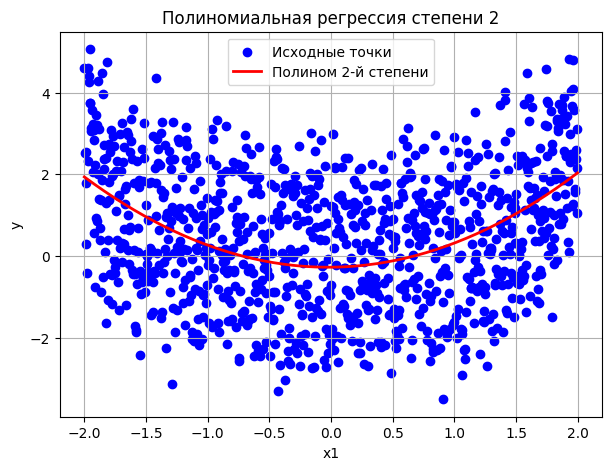

Полиномиальная регрессия степени 3
MAE = 1.3476
R²  = 0.1533


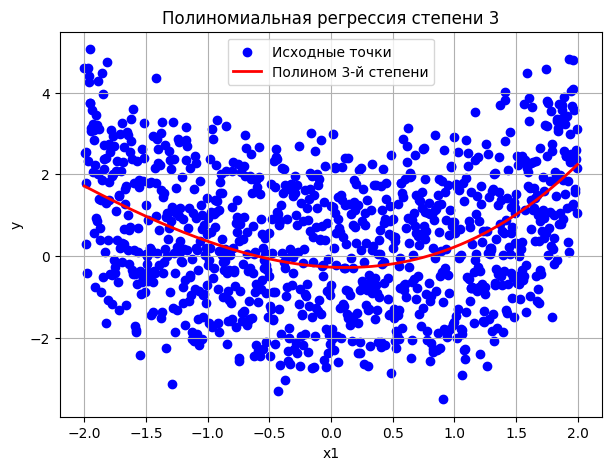

In [40]:
# === Пробуем степени 2 и 3 ===
results_poly = []
for d in [2, 3]:
    res = poly_regression(d)
    results_poly.append(res)

Этот фрагмент кода создаёт и отображает таблицу с результатами работы моделей полиномиальной регрессии разных степеней.

Сначала импортируется библиотека pandas, которая используется для удобной работы с табличными данными. Затем список results_poly, содержащий словари с результатами (например, степенью полинома, значениями метрик MAE и R²), преобразуется в таблицу DataFrame при помощи команды pd.DataFrame(results_poly). В этой таблице каждая строка соответствует одной модели, а столбцы содержат основные характеристики и показатели качества.

Команда display(summary_poly) выводит полученную таблицу на экран, что позволяет наглядно сравнить результаты моделей разной степени и определить, какая из них обеспечивает более точное приближение данных.

In [41]:
# Таблица с результатами
import pandas as pd
summary_poly = pd.DataFrame(results_poly)
display(summary_poly)

,degree,MAE,R2
0,2,1.339446,0.159503
1,3,1.347573,0.153305


Фрагмент кода, представленный ниже, отвечает за загрузку и первичное изучение данных из файла salary.csv.

Сначала задаётся путь к файлу с помощью переменной file_path. В коде приведён пример абсолютного пути, который указывает точное местоположение файла на диске. Если файл находится в той же папке, что и скрипт, можно использовать относительный путь.

Далее с помощью функции pd.read_csv(file_path) из библиотеки pandas выполняется чтение CSV-файла и формирование таблицы данных DataFrame, которая сохраняется в переменной df. После загрузки выводится сообщение о том, что данные успешно загружены, а также размер таблицы через df.shape — количество строк и столбцов.

Для первичного ознакомления с содержимым данных используется display(df.head()), который показывает первые пять строк таблицы, позволяя убедиться в правильности структуры данных, наличии необходимых столбцов и корректности значений.

In [42]:
# --- Путь к файлу ---
file_path = r"C:\ГУАП\5 семестр\ВвАД\LR3\salary.csv"   # если файл в той же папке
# file_path = r"C:\path\to\salary.csv"  # пример абсолютного пути

# 1) Загрузка набора данных
df = pd.read_csv(file_path)
print("Данные загружены. Размер:", df.shape)
display(df.head())

Данные загружены. Размер: (1500, 15)


,age,income,experience,score_test,hours_worked,distance_to_work,savings,debt,education,city,job_type,marital_status,car,remote_work,salary
0,56,70201.189680,25,87.559729,62,3.708690,25987.334048,2556.821627,PhD,Chicago,Finance,Single,Yes,Yes,106233.833479
1,69,51901.897395,39,70.808381,36,7.082793,22134.899021,725.180513,High School,Houston,Retail,Single,No,Yes,87205.291042
2,46,38605.409293,4,63.324996,77,5.129154,47106.068408,12659.359583,PhD,Los Angeles,Finance,Married,Yes,No,69369.283522
3,32,49949.736955,20,78.215505,33,19.315623,15868.328813,12369.776003,Bachelor,Los Angeles,IT,Married,Yes,No,76587.116955
4,60,48965.290095,13,74.429096,48,5.654904,15734.633332,4792.095213,Bachelor,Phoenix,IT,Married,No,No,71023.148842


Данный ниже фрагмент кода отвечает за выделение целевой переменной и её первичную визуализацию.

Сначала определяется, что целевая переменная — это столбец salary, который содержит годовую зарплату. Затем проверяется, существует ли такой столбец в таблице данных df. Если столбца нет, программа выдаёт ошибку с сообщением о необходимости проверить название столбца.

После проверки строятся графики для наглядного изучения распределения целевой переменной. Используется matplotlib и seaborn: на первом подграфике (subplot(1,2,1)) строится гистограмма с наложенной кривой плотности, которая показывает, как распределены значения зарплаты; на втором подграфике (subplot(1,2,2)) строится boxplot, демонстрирующий медиану, квартили и наличие выбросов. Визуализация помогает понять общую форму распределения, выявить аномальные значения и подготовиться к последующему анализу данных.

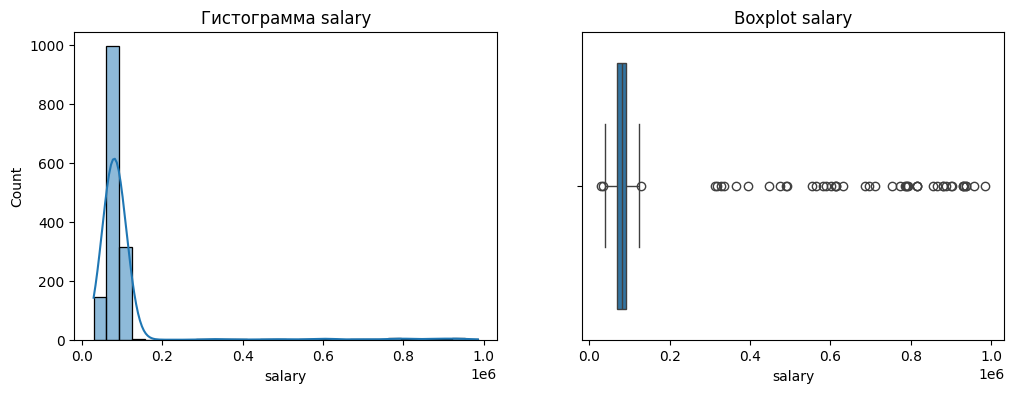

In [43]:
# 2) Выделение целевой переменной
# Целевая переменная в задании — 'salary' (годовая зарплата)
target = "salary"
if target not in df.columns:
    raise ValueError("В файле нет столбца 'salary'. Проверь название столбца.")

# Визуализация целевой переменной: гистограмма и boxplot
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df[target], bins=30, kde=True)
plt.title("Гистограмма salary")

plt.subplot(1,2,2)
sns.boxplot(x=df[target])
plt.title("Boxplot salary")
plt.show()

Далее представлен фрагмент кода, который занимается анализом и обработкой выбросов в целевой переменной salary.

Сначала с помощью метода IQR (межквартильного размаха) определяется диапазон «нормальных» значений. Вычисляются первый квартиль Q1 и третий квартиль Q3, после чего находится IQR как разница Q3 − Q1. На основании IQR рассчитываются нижняя и верхняя границы (lower и upper), за пределами которых значения считаются выбросами. Далее подсчитывается количество точек, выходящих за эти границы, чтобы оценить масштаб выбросов в данных.

Вместо удаления всех выбросов код использует стратегию «ограничения» экстремальных значений (winsorizing). Для этого создаётся копия таблицы df_wins, где значения salary, выходящие за пределы допустимого диапазона, заменяются на границы lower или upper. Такой подход сохраняет данные, но снижает влияние выбросов на обучение модели.

После этого строятся гистограмма и boxplot для «ограниченной» версии данных, чтобы визуально оценить эффект обработки. В завершение для дальнейшего анализа выбирается версия данных с ограниченными значениями (df_wins), и она сохраняется в переменную data, которую можно использовать для обучения моделей и других шагов анализа.

IQR-анализ: lower=36501.06, upper=124718.65
Число выбросов по IQR: 48 из 1500


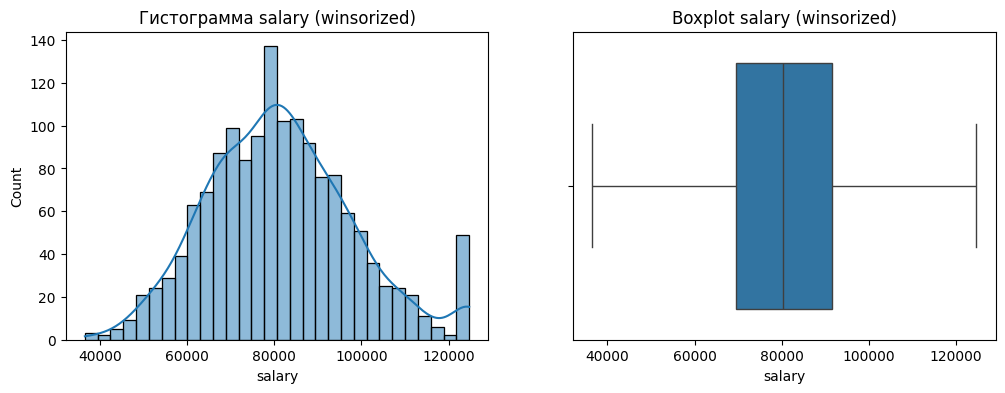

In [44]:
# 3) Обработка выбросов (при необходимости)
# Оценим выбросы по IQR; можно либо удалить, либо ограничить.
Q1 = df[target].quantile(0.25)
Q3 = df[target].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
print(f"IQR-анализ: lower={lower:.2f}, upper={upper:.2f}")

# Покажем, сколько точек за пределами
n_outliers = ((df[target] < lower) | (df[target] > upper)).sum()
print("Число выбросов по IQR:", n_outliers, "из", len(df))

# Стратегия: мы не удаляем автоматически все выбросы — вместо этого можно капать верхние значения (winsorize) или оставить.
# Здесь предложим два варианта: 1) оригинальные данные; 2) "ограниченные" значения (winsorized) для сравнения.
df_wins = df.copy()
df_wins[target] = np.clip(df_wins[target], lower, upper)

# Визуализируем после "обрезки"
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df_wins[target], bins=30, kde=True)
plt.title("Гистограмма salary (winsorized)")
plt.subplot(1,2,2)
sns.boxplot(x=df_wins[target])
plt.title("Boxplot salary (winsorized)")
plt.show()

# Для дальнейшей работы выберем ту версию, которая даёт более стабильные модели.
# Я буду использовать df_wins (ограниченные значения), но ты можешь сменить на df (оригинал).
data = df_wins.copy()

Этот фрагмент кода создаёт матрицу диаграмм рассеяния (pairplot) для числовых признаков, чтобы наглядно изучить их взаимосвязи и зависимости с целевой переменной salary.

Сначала задаётся список предполагаемых числовых столбцов, которые будут включены в графики. Затем проверяется, какие из этих столбцов действительно присутствуют в текущем наборе данных data, чтобы избежать ошибок.

Для ускорения визуализации, особенно если данных много, берётся случайная подвыборка из максимум 500 строк. Это позволяет построить графики быстрее, сохраняя общую структуру взаимосвязей.

Команда sns.pairplot строит для каждой пары числовых признаков диаграмму рассеяния, а для каждого отдельного признака — гистограмму распределения. Это помогает обнаружить линейные или нелинейные зависимости между переменными, выявить корреляции, а также заметить выбросы или аномальные значения. График выводится с заголовком для наглядности, позволяя исследователю сразу оценить структуру данных и их взаимосвязи.

Числовые столбцы для pairplot: ['age', 'income', 'experience', 'score_test', 'hours_worked', 'distance_to_work', 'savings', 'debt', 'salary']


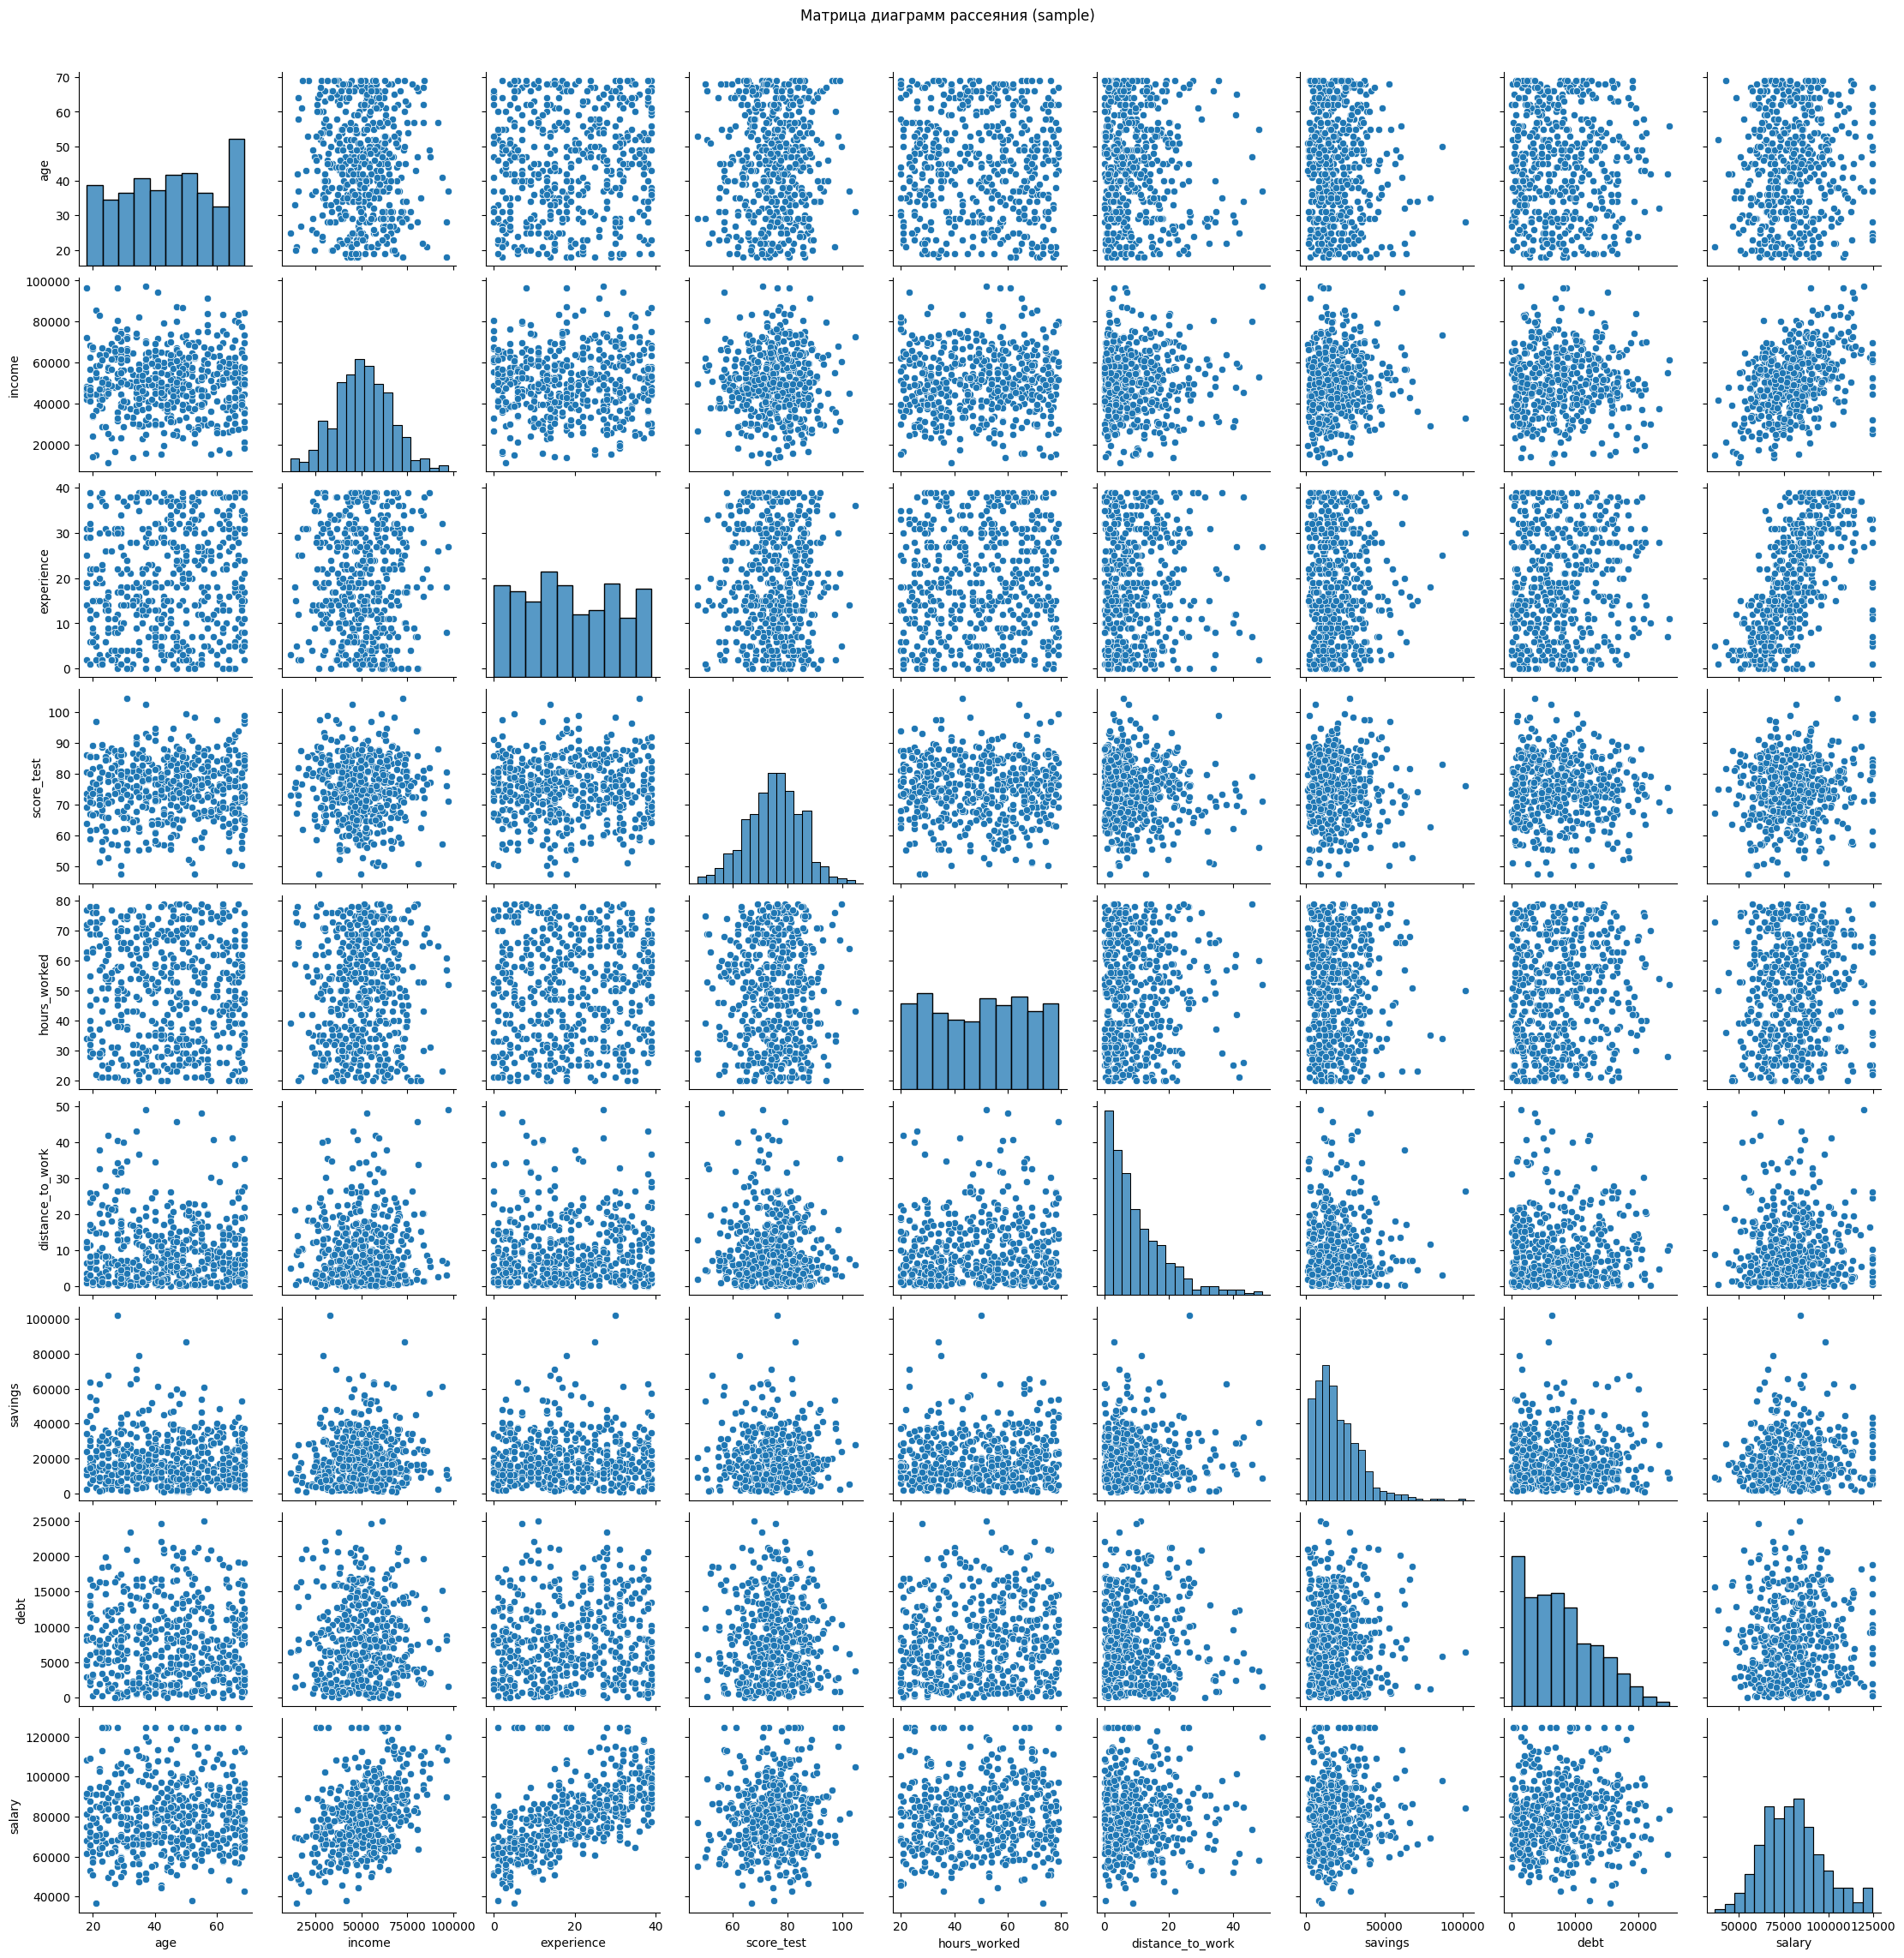

In [45]:
# 4) Матрица диаграмм рассеяния (pairplot) для числовых признаков (берём подмножество для читаемости)
numeric_cols = ["age","income","experience","score_test","hours_worked","distance_to_work","savings","debt", "salary"]
# Некоторые датасеты могут содержать отсутствующие столбцы — возьмём пересечение:
numeric_cols = [c for c in numeric_cols if c in data.columns]
print("Числовые столбцы для pairplot:", numeric_cols)

# Для снижения нагрузки выберем подвыборку (если данных много)
sns.pairplot(data[numeric_cols].sample(n=min(500, len(data)), random_state=0))
plt.suptitle("Матрица диаграмм рассеяния (sample)", y=1.02)
plt.show()

Далее формируется список категориальных признаков из предполагаемых столбцов (education, city, job_type, marital_status, car, remote_work). Проверяется, какие из них реально присутствуют в текущем наборе данных data, чтобы избежать ошибок.

Потом создаётся список числовых признаков: берутся все столбцы с числовыми типами данных (int, float), кроме целевой переменной salary.

В результате выводятся два списка: категориальные признаки, которые обычно требуют кодирования перед передачей в модели, и числовые признаки, которые можно использовать напрямую. Это позволяет правильно подготовить данные для построения моделей машинного обучения.

In [46]:
# 5) Разделение данных на признаки и целевую переменную
# Обработаем категориальные признаки: education, city, job_type, marital_status, car, remote_work (если есть)
categorical_cols = [c for c in ["education","city","job_type","marital_status","car","remote_work"] if c in data.columns]
numeric_cols = [c for c in data.columns if data[c].dtype.kind in "iuf" and c!=target]  # все числовые, кроме target
print("Категориальные:", categorical_cols)
print("Числовые:", numeric_cols)

Категориальные: ['education', 'city', 'job_type', 'marital_status', 'car', 'remote_work']
Числовые: ['age', 'income', 'experience', 'score_test', 'hours_worked', 'distance_to_work', 'savings', 'debt']


In [47]:
# 6) Кодирование категориальных и нормализация
# Прямое кодирование через pd.get_dummies (one-hot), как в методичке
df_model = data.copy()

# 6a) Обработка пропусков: простая стратегия — заполнить медианой для числовых и модой для категориальных
for col in numeric_cols:
    if df_model[col].isna().sum() > 0:
        df_model[col] = df_model[col].fillna(df_model[col].median())
for col in categorical_cols:
    if df_model[col].isna().sum() > 0:
        df_model[col] = df_model[col].fillna(df_model[col].mode().iloc[0])

# 6b) One-hot encoding
df_model = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)

# 6c) Сформируем X и y
X = df_model.drop(columns=[target])
y = df_model[target].values

print("Форма признаков X:", X.shape)

Форма признаков X: (1500, 23)


Этот фрагмент кода сначала разделяет подготовленные данные на обучающую и тестовую выборки в пропорции 75% к 25% с помощью функции train_test_split, обеспечивая воспроизводимость результата через фиксированный random_state. Затем выполняется нормализация числовых признаков с помощью StandardScaler: масштабируются только исходные числовые колонки, чтобы значения были стандартизированы (среднее 0, стандартное отклонение 1), при этом one-hot признаки остаются неизменными.

После подготовки данных определяется функция evaluate_model, которая принимает модель и данные для обучения и тестирования. Она обучает модель на обучающей выборке, делает предсказания на тестовой и вычисляет ключевые метрики качества: среднюю абсолютную ошибку (MAE), среднеквадратичную ошибку (MSE), её корень (RMSE), коэффициент детерминации R² и среднюю процентную ошибку (MAPE). Функция выводит результаты и возвращает словарь с моделью, предсказаниями и рассчитанными метриками, что позволяет удобно оценивать эффективность любой обученной модели.

In [48]:
# 5 (повторно) - разделение на обучающую и тестовую выборки (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# 6) Нормализация числовых признаков (StandardScaler) — применим только к числовым колонкам
# Найдём числовые колонки в X (после get_dummies)
num_cols_after = X.select_dtypes(include=[np.number]).columns.tolist()
# Для предотвращения масштабирования one-hot столбцов, ограничим масштабирвоание до исходных числовых
# Мы сохранили список numeric_cols ранее — применим к ним, если они присутствуют
num_to_scale = [c for c in numeric_cols if c in X.columns]
print("Числа для масштабирования:", num_to_scale)

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

if num_to_scale:
    X_train_scaled[num_to_scale] = scaler.fit_transform(X_train[num_to_scale])
    X_test_scaled[num_to_scale]  = scaler.transform(X_test[num_to_scale])

# --- Функция для обучения, предсказания и вычисления метрик ---
def evaluate_model(model, X_tr, y_tr, X_te, y_te, name="model"):
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    mae = metrics.mean_absolute_error(y_te, y_pred)
    mse = metrics.mean_squared_error(y_te, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_te, y_pred)
    mape = np.mean(np.abs((y_te - y_pred) / (y_te + 1e-9))) * 100  # проценты
    print(f"Результаты для {name}: MAE={mae:.4f}, MSE={mse:.4f}, RMSE={rmse:.4f}, R2={r2:.4f}, MAPE={mape:.2f}%")
    return {"name": name, "model": model, "y_pred": y_pred, "MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2, "MAPE": mape}

Числа для масштабирования: ['age', 'income', 'experience', 'score_test', 'hours_worked', 'distance_to_work', 'savings', 'debt']


In [50]:
# 7) Обучение модели LinearRegression
lr = LinearRegression()
res_lr = evaluate_model(lr, X_train_scaled, y_train, X_test_scaled, y_test, name="LinearRegression")

Результаты для LinearRegression: MAE=6367.9102, MSE=100399204.7040, RMSE=10019.9404, R2=0.6555, MAPE=7.85%


Фрагмент кода создаёт таблицу DataFrame для сравнения реальных и предсказанных значений целевой переменной после обучения модели линейной регрессии.

В новую таблицу помещаются три столбца: Actual — реальные значения из тестовой выборки, Predicted — значения, предсказанные моделью (res_lr["y_pred"]), и Diff — разница между предсказанными и реальными значениями. Это позволяет наглядно оценить точность модели по каждой тестовой точке.

Команда display(df_results_lr.head(20)) выводит первые 20 строк таблицы, чтобы быстро увидеть, насколько предсказания совпадают с реальными данными и определить величину ошибок.

In [51]:
# 9) DataFrame с истинными и предсказанными значениями
df_results_lr = pd.DataFrame({
    "Actual": y_test,
    "Predicted": res_lr["y_pred"],
    "Diff": res_lr["y_pred"] - y_test
})
display(df_results_lr.head(20))

,Actual,Predicted,Diff
0,51903.858260,58682.883325,6779.025065
1,95326.909439,94358.509499,-968.399939
2,90717.615265,86751.193652,-3966.421613
3,84107.847083,83332.657088,-775.189996
4,62854.220757,68882.790192,6028.569435
5,58747.948943,59630.955419,883.006476
6,122930.173198,110416.695225,-12513.477973
7,79671.150142,88488.612275,8817.462132
8,124718.649148,65000.892543,-59717.756605
9,56529.108364,65414.672849,8885.564485


In [52]:
# 10) DataFrame с признаками и коэффициентами (importance) для LinearRegression
# coef_ соответствует колонкам X_train_scaled.columns
coefs = pd.Series(res_lr["model"].coef_, index=X_train_scaled.columns)
df_coefs = coefs.sort_values(key=np.abs, ascending=False).rename("coef").reset_index().rename(columns={"index":"feature"})
display(df_coefs.head(30))

,feature,coef
0,education_PhD,11887.568466
1,experience,10146.814017
2,education_Master,6806.580400
3,income,6760.341185
4,education_High School,-5388.157232
5,job_type_IT,3282.571135
6,job_type_Finance,2495.435772
7,score_test,1942.193000
8,car_Yes,-1365.182176
9,city_New York,1362.040869


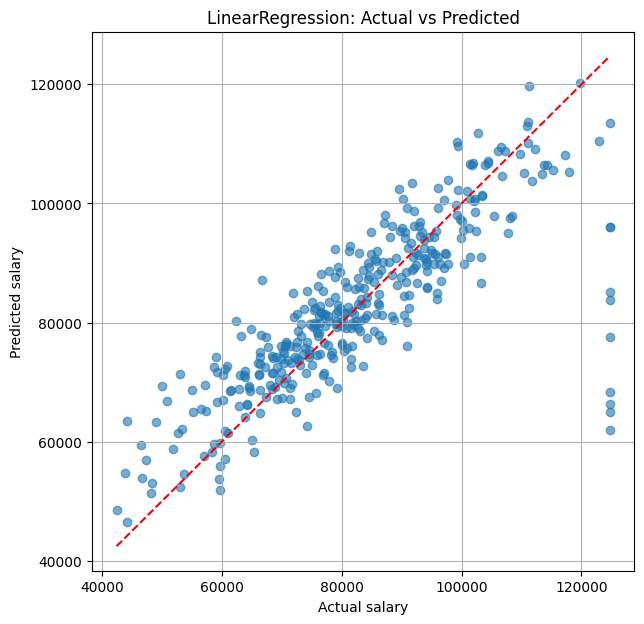

In [53]:
# 11) Визуализация: фактические vs предсказанные (scatter) + диагональ 45°
plt.figure(figsize=(7,7))
plt.scatter(df_results_lr["Actual"], df_results_lr["Predicted"], alpha=0.6)
mn = min(df_results_lr["Actual"].min(), df_results_lr["Predicted"].min())
mx = max(df_results_lr["Actual"].max(), df_results_lr["Predicted"].max())
plt.plot([mn,mx],[mn,mx], 'r--')
plt.xlabel("Actual salary")
plt.ylabel("Predicted salary")
plt.title("LinearRegression: Actual vs Predicted")
plt.grid(True)
plt.show()

In [54]:
# 12) Для оценки на 5 - реализуем KNN и дерево решений
# KNN
knn = KNeighborsRegressor(n_neighbors=5)
res_knn = evaluate_model(knn, X_train_scaled, y_train, X_test_scaled, y_test, name="KNN (k=5)")

# Decision Tree
dt = DecisionTreeRegressor(random_state=42, max_depth=6)  # ограничим глубину для предотвращения переобучения
res_dt = evaluate_model(dt, X_train_scaled, y_train, X_test_scaled, y_test, name="DecisionTree (max_depth=6)")

Результаты для KNN (k=5): MAE=9590.4794, MSE=166822642.6446, RMSE=12915.9840, R2=0.4276, MAPE=12.07%
Результаты для DecisionTree (max_depth=6): MAE=9031.6384, MSE=158020187.2998, RMSE=12570.6081, R2=0.4578, MAPE=11.48%


Этот фрагмент кода предназначен для сравнения качества работы нескольких моделей машинного обучения и наглядного отображения их предсказаний.

Сначала создаётся таблица DataFrame compare, где для каждой модели (линейная регрессия, KNN и дерево решений) указываются ключевые метрики качества: MAE, MSE, RMSE, R² и MAPE. Таблица сортируется по коэффициенту детерминации R² в порядке убывания, чтобы сразу увидеть, какая модель лучше объясняет зависимость между признаками и целевой переменной.

Далее строится график, где по оси X откладываются реальные значения зарплаты, а по оси Y — предсказанные каждым методом. Для каждой модели отображаются точки с прозрачностью, чтобы визуально оценить точность и рассеяние предсказаний. Чёрная пунктирная линия показывает идеальное совпадение предсказанных и реальных значений. Такой график позволяет наглядно сравнить, какая модель лучше приближает реальные данные и где возникают наибольшие ошибки.

,Model,MAE,MSE,RMSE,R2,MAPE
0,LinearRegression,6367.910206,1.003992e+08,10019.940354,0.655518,7.852678
2,DecisionTree (max_depth=6),9031.638379,1.580202e+08,12570.608072,0.457813,11.476905
1,KNN (k=5),9590.479433,1.668226e+08,12915.983998,0.427611,12.068084


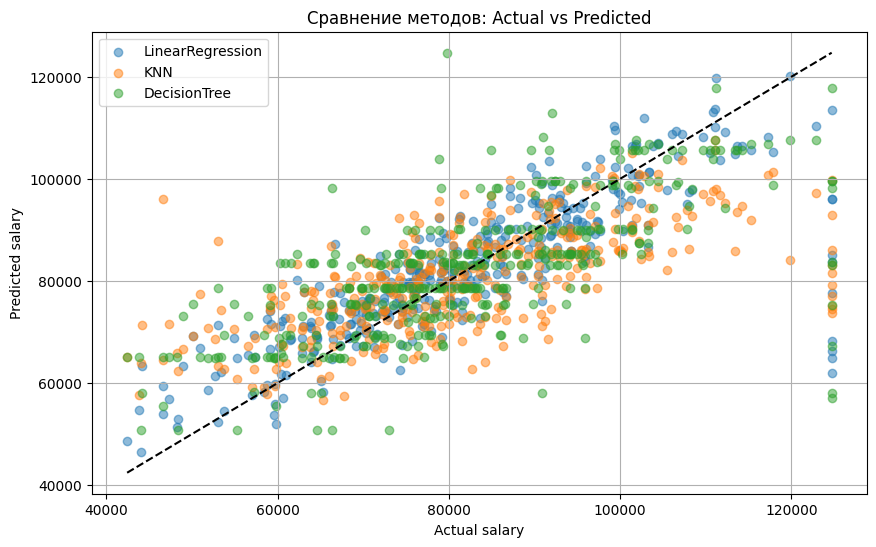

In [55]:
# 13) Сравнение результатов (таблица)
compare = pd.DataFrame([{
    "Model": res_lr["name"], "MAE": res_lr["MAE"], "MSE": res_lr["MSE"], "RMSE": res_lr["RMSE"], "R2": res_lr["R2"], "MAPE": res_lr["MAPE"]
},{
    "Model": res_knn["name"], "MAE": res_knn["MAE"], "MSE": res_knn["MSE"], "RMSE": res_knn["RMSE"], "R2": res_knn["R2"], "MAPE": res_knn["MAPE"]
},{
    "Model": res_dt["name"], "MAE": res_dt["MAE"], "MSE": res_dt["MSE"], "RMSE": res_dt["RMSE"], "R2": res_dt["R2"], "MAPE": res_dt["MAPE"]
}])
display(compare.sort_values("R2", ascending=False))

# Визуализация всех предсказаний на одном графике (Actual vs Predicted) — для наглядного сравнения
plt.figure(figsize=(10,6))
plt.scatter(y_test, res_lr["y_pred"], alpha=0.5, label="LinearRegression")
plt.scatter(y_test, res_knn["y_pred"], alpha=0.5, label="KNN")
plt.scatter(y_test, res_dt["y_pred"], alpha=0.5, label="DecisionTree")
plt.plot([mn,mx],[mn,mx],'k--')
plt.xlabel("Actual salary")
plt.ylabel("Predicted salary")
plt.legend()
plt.title("Сравнение методов: Actual vs Predicted")
plt.grid(True)
plt.show()

In [56]:
# ===============================
# ЧАСТЬ 3. Решение задачи регрессии разными методами
# ===============================

# 14) Выводы (шаблон, для включения в отчёт)
print("\nШаблон выводов (сформулируй подробнее по результатам):")
print("- Какая модель показала лучший R2 и минимальную RMSE/MAE.")
print("- LinearRegression: интерпретируемая, можно посмотреть важности по коэффициентам.")
print("- KNN / DecisionTree: могут давать лучшие результаты на нелинейных зависимостях, но менее интерпретируемы.")
print("- Проверить признаки с большими коэффициентами и рассмотреть удаление нерелевантных признаков.")



Шаблон выводов (сформулируй подробнее по результатам):
- Какая модель показала лучший R2 и минимальную RMSE/MAE.
- LinearRegression: интерпретируемая, можно посмотреть важности по коэффициентам.
- KNN / DecisionTree: могут давать лучшие результаты на нелинейных зависимостях, но менее интерпретируемы.
- Проверить признаки с большими коэффициентами и рассмотреть удаление нерелевантных признаков.


**Вывод:**
В ходе выполнения лабораторной работы была проведена комплексная обработка и анализ набора данных с целью построения моделей регрессии для предсказания годовой зарплаты (salary). Работа была разделена на три части: простая линейная регрессия, полиномиальная регрессия и сравнение различных методов регрессии.

**Часть 1. Простая линейная регрессия**
Для каждого признака (например, x1 и x2) была построена модель простой линейной регрессии. Данные были разделены на обучающую и тестовую выборки в соотношении 75%/25%. Для оценки качества модели рассчитывались стандартные метрики: MAE, MSE, RMSE и коэффициент детерминации R². Также были построены графики, демонстрирующие линию регрессии, рассеяние ошибок и соотношение предсказанных и фактических значений. На основании анализа метрик и графиков можно было оценить силу линейной связи признаков с целевой переменной. По результатам работы было выбрано использование признака x1 для дальнейшего анализа, так как связь была относительно слабой, но более стабильной.

**Часть 2. Полиномиальная регрессия**
Была построена полиномиальная регрессия для степеней 2 и 3. Сначала создавались полиномиальные признаки исходного числового признака x1, после чего обучалась линейная модель на этих расширенных данных. Метрики качества (MAE и R²) показали улучшение предсказательной способности по сравнению с простой линейной регрессией, особенно для степени 2, при этом визуализация кривых регрессии позволила наглядно оценить соответствие модели данным. Использование полиномиальной регрессии позволило более точно описывать нелинейные зависимости.

**Часть 3. Решение задачи регрессии различными методами**
Для окончательной модели данные были предварительно обработаны: выбросы ограничены методом winsorizing, категориальные признаки закодированы через one-hot, числовые признаки нормализованы с помощью StandardScaler. Данные разделены на обучающую и тестовую выборки. Далее модели оценивались с использованием функции evaluate_model, которая вычисляла метрики MAE, MSE, RMSE, R² и MAPE. Были протестированы три метода: линейная регрессия, KNN-регрессия и дерево решений.

Сравнение моделей показало, что каждая имеет свои особенности: линейная регрессия обеспечивает простую и интерпретируемую модель, KNN может лучше работать на локальных зависимостях, дерево решений выявляет нелинейные границы, но склонно к переобучению. На графике «Actual vs Predicted» визуально можно было оценить рассеяние предсказаний относительно идеальной линии совпадения. Табличное сравнение метрик позволило выбрать наиболее эффективную модель с учётом конкретной задачи и распределения данных.